### Q1. What is the relationship between polynomial functions and kernel functions in machine learning algorithms?

In machine learning algorithms, kernel functions and polynomial functions are related in the context of feature transformation, particularly when using the kernel trick.

#### Kernel Functions:

Kernel functions are used in various machine learning algorithms, including Support Vector Machines (SVMs), to implicitly map data points into a higher-dimensional space without explicitly calculating the mapped feature vectors.

Kernel functions compute the dot product (inner product) between these implicitly mapped feature vectors in the higher-dimensional space.

##### Common kernel functions include:

* Linear Kernel: Computes the dot product in the original feature space, essentially performing no transformation.
* Polynomial Kernel: Computes the dot product after applying a polynomial function to the original feature vectors. The degree of the polynomial is a parameter that can be adjusted.
* Radial Basis Function (RBF) Kernel: Computes the dot product after applying a Gaussian-like function to the original feature vectors, which results in a non-linear transformation.

#### Polynomial Functions:

Polynomial functions are a type of mathematical function that involve raising a variable to a power, such as x^2, x^3, etc.

In the context of kernel functions, the polynomial kernel is a specific type of kernel function that uses polynomial functions to perform the feature transformation.

The polynomial kernel can be defined as:

**K(x, y) = (α * (x * y) + c)^d**

Where K(x, y) is the kernel function value between data points x and y.
α is a scaling factor.
c is an offset.
d is the degree of the polynomial.

#### Relationship:

The relationship between polynomial functions and kernel functions lies in the use of polynomial functions within the polynomial kernel. The polynomial kernel employs polynomial functions to transform the original feature vectors implicitly into a higher-dimensional space, making it non-linear. The degree of the polynomial, d, determines the complexity of the transformation. When d is 1, it corresponds to a linear kernel, meaning no polynomial transformation is applied, and the original feature space is used.

In summary, polynomial functions are an integral part of the polynomial kernel, which is a type of kernel function used in SVMs and other machine learning algorithms. The kernel function leverages polynomial transformations to enable non-linear decision boundaries in the higher-dimensional space, allowing these algorithms to capture complex relationships in the data. The choice of the polynomial degree, as well as other kernel parameters, affects the model's ability to fit the data and its generalization performance.

### Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?

Accuracy: 0.73


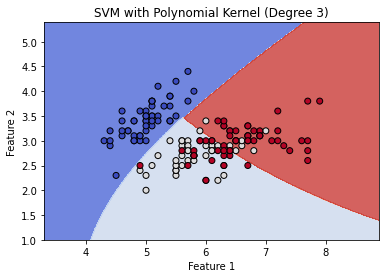

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset 
iris = datasets.load_iris()
X = iris.data[:, :2]  # Take the first two features for simplicity
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM classifier with a polynomial kernel
svm_classifier = SVC(kernel='poly')  

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, marker='o', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with Polynomial Kernel (Degree 3)')
plt.show()

### Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?

In Support Vector Regression (SVR), the parameter ε (epsilon) is associated with the margin of the ε-insensitive tube or ε-tube. The ε-tube is a range around the predicted values where errors are tolerated and do not contribute to the loss function. It plays a crucial role in determining the number of support vectors and the model's flexibility. The relationship between ε and the number of support vectors is as follows:

#### Larger ε (Wider ε-Tube):

* Increasing the value of ε results in a wider ε-tube.
* With a wider ε-tube, the SVR model allows for larger prediction errors before considering data points as support vectors.
* As ε becomes larger, the model becomes more tolerant of errors and tends to have fewer support vectors.
* Fewer support vectors result in a simpler model with potentially higher bias but lower variance.

#### Smaller ε (Narrower ε-Tube):

* Decreasing the value of ε results in a narrower ε-tube.
* With a narrower ε-tube, the SVR model is less tolerant of errors and considers more data points as support vectors.
* As ε becomes smaller, the model becomes less tolerant of errors and aims for a precise fit to the training data.
* More support vectors result in a more complex model with potentially lower bias but higher variance.

The choice of ε in SVR determines the trade-off between model simplicity and precision. Larger ε values encourage a simpler model with fewer support vectors and higher bias, while smaller ε values lead to a more complex model with more support vectors and lower bias. The optimal value of ε depends on the specific problem, and it is often determined through cross-validation or grid search techniques to find the best trade-off between bias and variance for the given dataset.

### Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter affect the performance of Support Vector Regression (SVR)? Can you explain how each parameter works and provide examples of when you might want to increase or decrease its value?

Support Vector Regression (SVR) is a powerful regression technique that relies on several hyperparameters to control its performance and flexibility. The choice of kernel function, C parameter, epsilon (ε) parameter, and gamma (γ) parameter can significantly impact the performance of an SVR model. Let's discuss each parameter and how it affects SVR:

### Kernel Function:   

**Role:** The kernel function specifies the type of transformation applied to the input features. Common kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid.    

**Effect:** The choice of the kernel function determines the model's ability to capture non-linear relationships in the data. Different kernel functions are suitable for different types of data and problem domains.     

**Example:**  
* Use a linear kernel when you believe the relationship between features and the target variable is approximately linear.
* Use an RBF kernel when you expect complex, non-linear relationships.  
 
### C Parameter:  

**Role:** The C parameter (regularization parameter) controls the trade-off between fitting the training data and maintaining a smooth decision boundary. It balances the margin width and the training error.      

**Effect:**
* Smaller C values result in a wider margin and a more tolerant model that may underfit.  
* Larger C values lead to a narrower margin, a less tolerant model, and potential overfitting to the training data.   

**Example:**
* Increase C when you want a more precise fit to the training data but be cautious of overfitting.  
* Decrease C when you want a more generalized model with a wider margin.  

### Epsilon (ε) Parameter:

**Role:** Epsilon defines the size of the ε-tube around the regression line. Data points within this tube are not considered as errors.   

**Effect:**
* A larger ε allows for larger prediction errors and results in a more tolerant model with fewer support vectors.   
* A smaller ε makes the model less tolerant of errors and leads to more support vectors.  

**Example:**
* Increase ε when you want to allow for some level of noise or errors in your data.  
* Decrease ε when you want a more precise fit to the data and want to minimize deviations from the regression line.  

### Gamma (γ) Parameter:

**Role:** The gamma parameter is specific to certain kernel functions, such as RBF. It controls the shape of the kernel function and the influence of each training point.   

**Effect:**
* Smaller gamma values make the kernel function more spread out, resulting in a smoother decision boundary.  
* Larger gamma values make the kernel function more focused on individual data points, potentially leading to a more complex and wiggly decision boundary.  

**Example:**
* Increase gamma when you want the model to be sensitive to local variations in the data.   
* Decrease gamma when you want a more global view of the data and a smoother decision boundary.   


Choosing appropriate values for these hyperparameters is crucial for building an effective SVR model. Hyperparameter tuning techniques, such as cross-validation and grid search, can help find the optimal combination of hyperparameter values for your specific dataset and problem. The choice of hyperparameters should be guided by a balance between model complexity, bias, and variance to achieve good generalization performance on unseen data.

### Q5. Assignment:
* Import the necessary libraries and load the dataset
* Split the dataset into training and testing set
* Preprocess the data using any technique of your choice (e.g. scaling, normalization)
* Create an instance of the SVC classifier and train it on the training data
* Use the trained classifier to predict the labels of the testing data
* Evaluate the performance of the classifier using any metric of your choice (e.g. accuracy, precision, recall, F1-score)
* Tune the hyperparameters of the SVC classifier using GridSearchCV or RandomizedSearchCV to improve its performance
* Train the tuned classifier on the entire dataset
* Save the trained classifier to a file for future use.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data (Standard Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train an instance of the SVC classifier
svc = SVC(random_state=42)
svc.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svc.predict(X_test_scaled)

# Evaluate performance
print("Initial Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("\nBest Hyperparameters:", grid_search.best_params_)

# Train the tuned classifier on the entire dataset
final_model = grid_search.best_estimator_

# Retrain on full data (after scaling)
X_full_scaled = scaler.fit_transform(X)
final_model.fit(X_full_scaled, y)

Initial Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


SVC(C=10, kernel='linear', random_state=42)

#### python code for Saving the model for future use :  

##### Save the trained classifier
import joblib  # For saving the model     
joblib.dump(final_model, 'svc_iris_model.pkl')   
print("\nModel saved successfully as 'svc_iris_model.pkl'")   